In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_excel('autoMPG_data.xlsx')

In [3]:
df.head()

,GallonsPer100Miles,GallonsPer100MilesTo1981,MPG,Cylinders,Displacement100ci,Horsepower100,Weight1000lb,Seconds0to60,Year,Year70To81,Origin,Origin.Eq.1,Origin.Eq.2,Origin.Eq.3,Name
0,5.555556,5.555556,18.0,8,3.07,1.30,3.504,12.0,70,1,1,1,0,0,chevrolet chevelle malibu
1,6.666667,6.666667,15.0,8,3.50,1.65,3.693,11.5,70,1,1,1,0,0,buick skylark 320
2,5.555556,5.555556,18.0,8,3.18,1.50,3.436,11.0,70,1,1,1,0,0,plymouth satellite
3,6.250000,6.250000,16.0,8,3.04,1.50,3.433,12.0,70,1,1,1,0,0,amc rebel sst
4,5.882353,5.882353,17.0,8,3.02,1.40,3.449,10.5,70,1,1,1,0,0,ford torino


In [4]:
df = df.drop(['GallonsPer100MilesTo1981', 'MPG','Year', 'Cylinders', 'Name', 'Seconds0to60', 'Origin.Eq.1', 'Year70To81', 'Origin', 'Origin.Eq.2', 'Origin.Eq.3'], axis=1)
df

,GallonsPer100Miles,Displacement100ci,Horsepower100,Weight1000lb
0,5.555556,3.07,1.30,3.504
1,6.666667,3.50,1.65,3.693
2,5.555556,3.18,1.50,3.436
3,6.250000,3.04,1.50,3.433
4,5.882353,3.02,1.40,3.449
...,...,...,...,...
387,3.703704,1.40,0.86,2.790
388,2.272727,0.97,0.52,2.130
389,3.125000,1.35,0.84,2.295
390,3.571429,1.20,0.79,2.625


In [5]:
#linear regression model
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

linReg = linear_model.LinearRegression()
linReg.fit(df[['Horsepower100', 'Weight1000lb', 'Displacement100ci']], df.GallonsPer100Miles)
print(linReg)

LinearRegression()


In [6]:
#Correlation coefficients for HorsePower, weight and Displacement
print("Coefficients: ", linReg.coef_)

Coefficients:  [1.40433496 1.03050654 0.13320096]


Based on coefficients and intercept, determining the best variable

In [7]:
# Preparing the data for the regression model
X = df['Horsepower100'].to_frame()
y = df['GallonsPer100Miles']

In [8]:
HorsePower_model = linear_model.LinearRegression().fit(X.values,y)

In [9]:
print("HorsePower:", HorsePower_model.coef_, " Intercept:", HorsePower_model.intercept_)

HorsePower: [3.69527283]  Intercept: 0.9218138877684923


In [10]:
X = df['Weight1000lb'].to_frame()
Weight_model = linear_model.LinearRegression().fit(X.values,y)

In [11]:
print("Weight:", Weight_model.coef_, " Intercept:", Weight_model.intercept_)

Weight: [1.73378735]  Intercept: -0.3802549901551391


In [12]:
#As we can see from this test, the fuel consumption is raising the most if car has more HousePower

Predictions

In [13]:
print("GallonsPer100Miles: ", HorsePower_model.predict(pd.DataFrame([1, 1.1, 1.2, 2, 2.5, 6])))

GallonsPer100Miles:  [ 4.61708672  4.986614    5.35614128  8.31235955 10.15999596 23.09345087]


In [14]:
# the following value is on the interpolation range
HorsePower_model.predict(pd.DataFrame([3]))   

array([12.00763238])

In [15]:
# The following value is on the extrapolation range
HorsePower_model.predict(pd.DataFrame([1]))   

array([4.61708672])

Some charts

c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


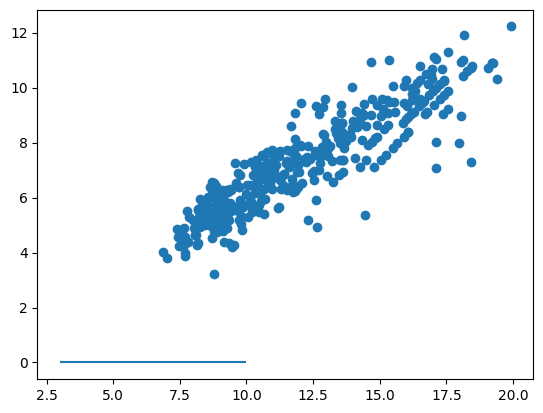

In [16]:
# Plotting the error terms
plt.scatter(HorsePower_model.predict(X), HorsePower_model.predict(X)-y)

plt.hlines(y=0,xmin=3,xmax=10)


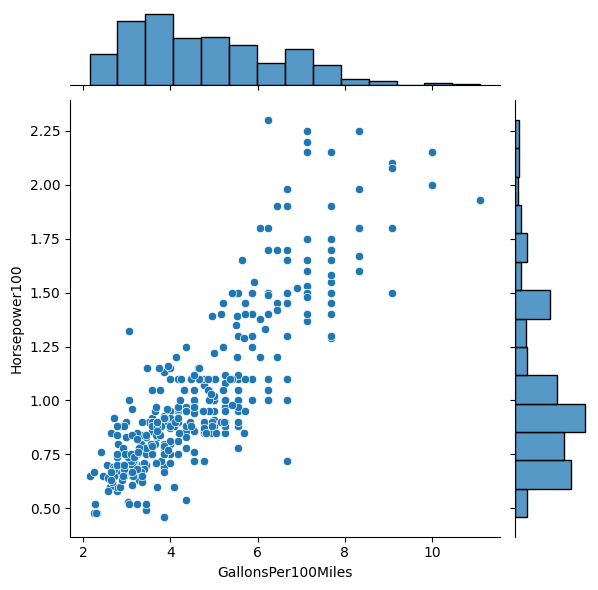

In [17]:
ax1 = sns.jointplot(data = df, x = 'GallonsPer100Miles', y = 'Horsepower100')

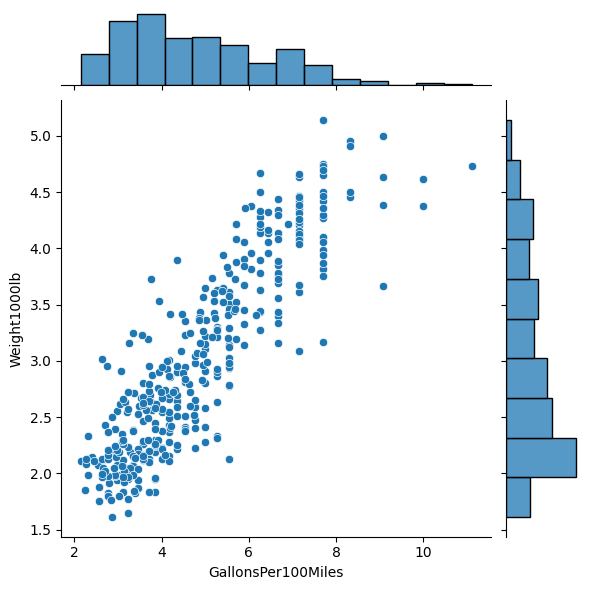

In [18]:
ax1 = sns.jointplot(data = df, x = 'GallonsPer100Miles', y = 'Weight1000lb')


<AxesSubplot: >

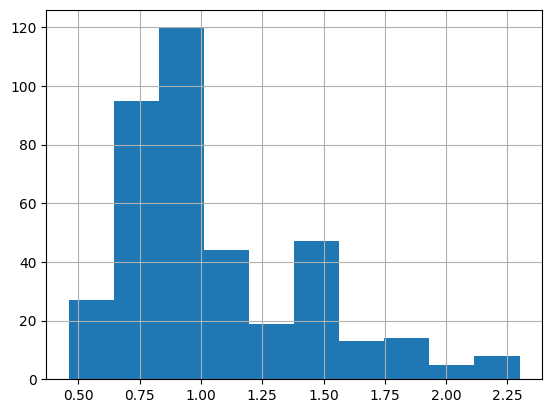

In [19]:
df['Horsepower100'].hist()